In [4]:
import rasterio as rio
import rioxarray as rxr
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [33]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

<!-- ## Univariate Analysis -->

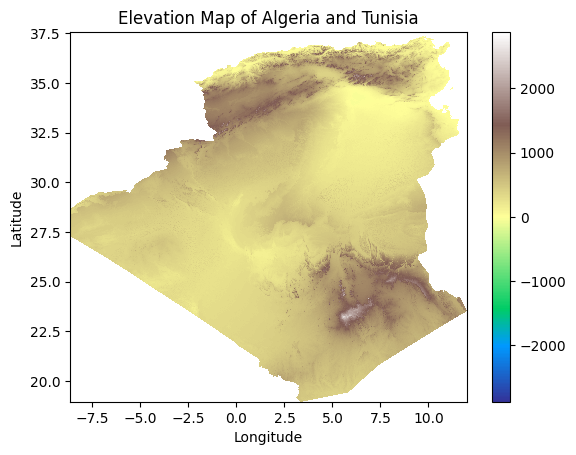

In [34]:
file_path = processed_files["elevation"] / "Elevation_DZ_TN.tif"
elevation_data = rxr.open_rasterio(file_path, masked=True).squeeze()

# Créer la figure et afficher l'image
fig, ax = plt.subplots()  # carré
elevation_data.plot.imshow(ax=ax, cmap='terrain')

# Ajouter le titre et les labels
ax.set_title('Elevation Map of Algeria and Tunisia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [5]:
print(elevation_data)

<xarray.DataArray (y: 4465, x: 4960)> Size: 89MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(4465, 4960), dtype=float32)
Coordinates:
  * y            (y) float64 36kB 37.56 37.56 37.55 37.55 ... 18.97 18.96 18.96
  * x            (x) float64 40kB -8.673 -8.669 -8.665 ... 11.98 11.99 11.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [6]:
print(elevation_data.attrs)

{'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0}


In [7]:
print(elevation_data.coords)

Coordinates:
  * y            (y) float64 36kB 37.56 37.56 37.55 37.55 ... 18.97 18.96 18.96
  * x            (x) float64 40kB -8.673 -8.669 -8.665 ... 11.98 11.99 11.99
    band         int64 8B 1
    spatial_ref  int64 8B 0


In [8]:
print("number of mising values:",np.isnan(elevation_data.values).sum())
missing = np.isnan(elevation_data.values).sum()
total = elevation_data.values.size
missing_percent = (missing / total) * 100
print(f"Missing percentage: {missing_percent:.2f}%")



number of mising values: 9026840
Missing percentage: 40.76%


In [9]:
non_missing = np.count_nonzero(~np.isnan(elevation_data.values))
print("Non-missing values:", non_missing)


Non-missing values: 13119560


In [10]:
print("Min:",elevation_data.min().values)
print("Max:",elevation_data.max().values)
print("Mean:",elevation_data.mean().values)
print("Median:",elevation_data.median().values)
values=elevation_data.values.flatten()
values=values[~np.isnan(values)]
mode_value=stats.mode(values, keepdims=True).mode[0]
print("mode:",mode_value)
print("std:",elevation_data.std().values)

Min: -872.0
Max: 2877.0
Mean: 538.4412
Median: 464.0
mode: 301.0
std: 324.4385


boxplot

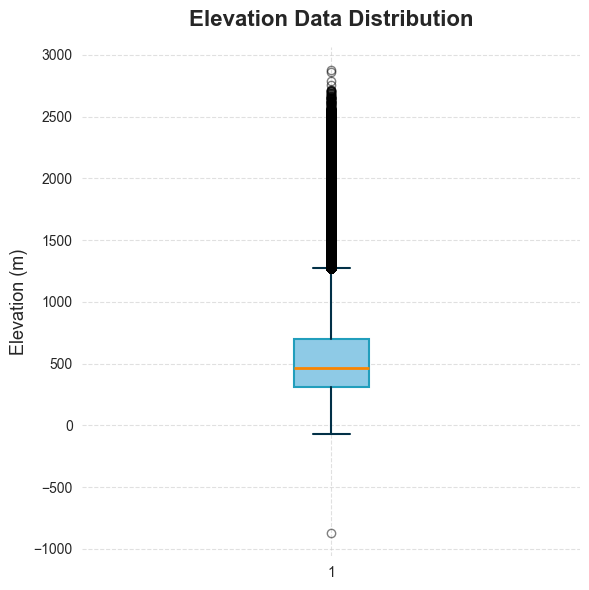

In [11]:
# --- Plot boxplot ---
# Prepare the data
values = elevation_data.values.flatten()
values = values[~np.isnan(values)]

# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))

# Create a nicer boxplot
box = plt.boxplot(values,
                  vert=True,
                  patch_artist=True,
                  boxprops=dict(facecolor="#8ecae6", color="#219ebc", linewidth=1.5),
                  medianprops=dict(color="#fb8500", linewidth=2),
                  whiskerprops=dict(color="#023047", linewidth=1.5),
                  capprops=dict(color="#023047", linewidth=1.5),
                  flierprops=dict(marker='o', color="#ffb703", alpha=0.5))

# Add title and labels
plt.title("Elevation Data Distribution", fontsize=16, fontweight="bold", pad=15)
plt.ylabel("Elevation (m)", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.6)

# Clean layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Histograms

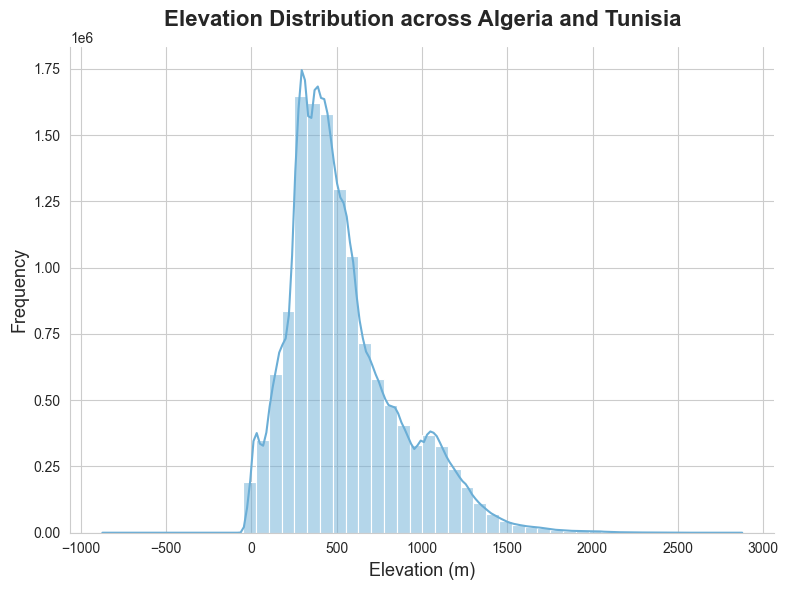

In [12]:
# Set a beautiful Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
# Draw histogram with filled color and smooth edges
sns.histplot(elevation_data.values.flatten(), bins=50, color="#6baed6", edgecolor="white", kde=True)

# Titles and labels with better formatting
plt.title("Elevation Distribution across Algeria and Tunisia", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Elevation (m)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

# Remove unnecessary borders and make layout clean
sns.despine()
plt.tight_layout()
plt.show()

### Data Preprocessing
after visulizing the eda, i observed that the outliers are not errors, so we can not simply remove them, instead we can use other methods like log transformation of binning, log transformation is useful when the data is highly skewed, so its not a good fit here, instead i choosed bining (equal width)

In [7]:
# Convert xarray to pandas DataFrame
elevation_df = elevation_data.to_dataframe(name='elevation').reset_index()


In [10]:
elevation_df.head()

,y,x,band,spatial_ref,elevation
0,37.560278,-8.673056,1,0,NaN
1,37.560278,-8.668889,1,0,NaN
2,37.560278,-8.664722,1,0,NaN
3,37.560278,-8.660556,1,0,NaN
4,37.560278,-8.656389,1,0,NaN


In [12]:
elevation_df = elevation_df[['x', 'y', 'elevation']]
elevation_df.head()

,x,y,elevation
0,-8.673056,37.560278,NaN
1,-8.668889,37.560278,NaN
2,-8.664722,37.560278,NaN
3,-8.660556,37.560278,NaN
4,-8.656389,37.560278,NaN


In [17]:
elevation_df = elevation_df.rename(columns={'x': 'longitude', 'y': 'latitude'})
elevation_df.head()

,longitude,latitude,elevation
0,-8.673056,37.560278,NaN
1,-8.668889,37.560278,NaN
2,-8.664722,37.560278,NaN
3,-8.660556,37.560278,NaN
4,-8.656389,37.560278,NaN


In [24]:

kept_df = elevation_df[elevation_df['elevation'].notna()]

In [25]:
kept_df.head()

,longitude,latitude,elevation
9191,8.956111,37.556111,0.0
14149,8.947778,37.551944,0.0
29028,8.943611,37.539444,1.0
29029,8.947778,37.539444,0.0
33987,8.939444,37.535278,0.0


In [26]:
print(kept_df.head(10))
print(len(kept_df))

       longitude   latitude  elevation
9191    8.956111  37.556111        0.0
14149   8.947778  37.551944        0.0
29028   8.943611  37.539444        1.0
29029   8.947778  37.539444        0.0
33987   8.939444  37.535278        0.0
33988   8.943611  37.535278       12.0
33989   8.947778  37.535278        0.0
38942   8.918611  37.531111        0.0
38943   8.922778  37.531111        0.0
38944   8.926944  37.531111        0.0
13119560


im gonna use Sturges Formula for binning:

In [28]:
import numpy as np
import pandas as pd

# Suppose your DataFrame is called elevation_df and the column is 'elevation'
n = len(kept_df['elevation'])

# Sturges' formula
num_bins = int(1 + 3.322 * np.log10(n))

print(f"Number of bins (Sturges formula): {num_bins}")

Number of bins (Sturges formula): 24


In [29]:
kept_df['elevation_bin'] = pd.cut(kept_df['elevation'], bins=num_bins)
print(kept_df.head())

       longitude   latitude  elevation     elevation_bin
9191    8.956111  37.556111        0.0  (-90.958, 65.25]
14149   8.947778  37.551944        0.0  (-90.958, 65.25]
29028   8.943611  37.539444        1.0  (-90.958, 65.25]
29029   8.947778  37.539444        0.0  (-90.958, 65.25]
33987   8.939444  37.535278        0.0  (-90.958, 65.25]


C:\Users\BIG BOX\AppData\Local\Temp\ipykernel_28324\1433061554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kept_df['elevation_bin'] = pd.cut(kept_df['elevation'], bins=num_bins)


-2,877 why its in the interval?:That’s because of a tiny floating-point adjustment pandas makes internally to ensure that the lowest value (0) is included in the first bin.

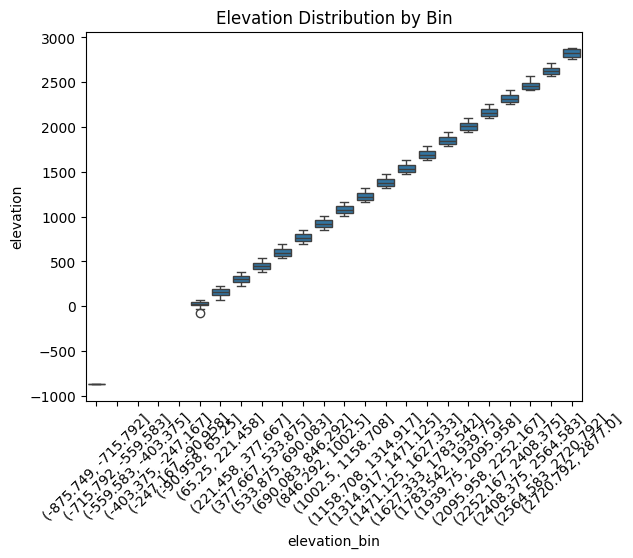

In [31]:
sns.boxplot(x='elevation_bin', y='elevation', data=kept_df)
plt.title("Elevation Distribution by Bin")
plt.xticks(rotation=45)
plt.show()

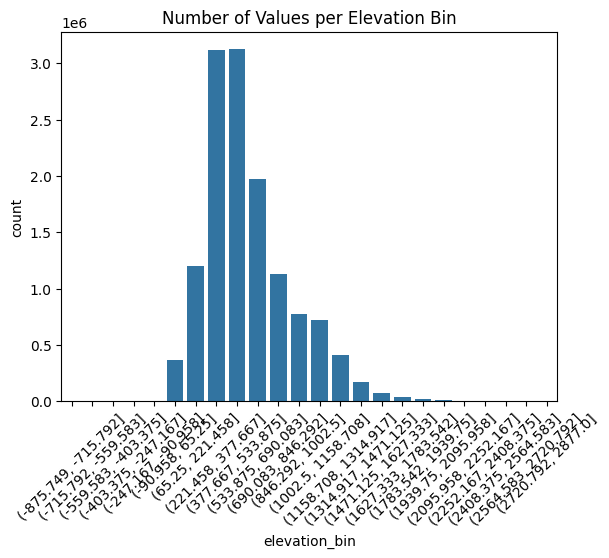

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.boxplot(x=elevation_df['elevation_bin'])
# plt.show()
sns.countplot(x='elevation_bin', data=kept_df)
plt.xticks(rotation=45)
plt.title("Number of Values per Elevation Bin")
plt.show()